In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "drive/MyDrive/ECGR 4106/HW_1/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
torch.version.__version__

'1.10.0+cu111'

Problem 1,
Load all the images and convert them to tensors

In [ ]:
import imageio

# 3 Blue images
img_arr = imageio.imread(file_path + "blueberry.jfif")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img1 = img.permute(2, 0, 1)

img_arr = imageio.imread(file_path + "blueman.jpg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img2 = img.permute(2, 0, 1)

img_arr = imageio.imread(file_path + "flower.jpeg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img3 = img.permute(2, 0, 1)

# 3 Green Images
img_arr = imageio.imread(file_path + "frog.jpg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img4 = img.permute(2, 0, 1)

img_arr = imageio.imread(file_path + "kiwi.jpeg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img5 = img.permute(2, 0, 1)

img_arr = imageio.imread(file_path + "snake.jpg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img6 = img.permute(2, 0, 1)

# 3 Red images
img_arr = imageio.imread(file_path + "strawberry.jpg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img7 = img.permute(2, 0, 1)

img_arr = imageio.imread(file_path + "pepper.jpeg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img8 = img.permute(2, 0, 1)

img_arr = imageio.imread(file_path + "tomato.jpg")
img = torch.from_numpy(img_arr)
img = img.float()
img /= 255.0
img9 = img.permute(2, 0, 1)


Average the 3 rgb channels together over all pixels to get overall brightness

In [ ]:
m1 = torch.mean(img1)
print(m1)
m2 = torch.mean(img2)
print(m2)
m3 = torch.mean(img3)
print(m3)

m4 = torch.mean(img4)
print(m4)
m5 = torch.mean(img5)
print(m5)
m6 = torch.mean(img6)
print(m6)

m7 = torch.mean(img7)
print(m7)
m8 = torch.mean(img8)
print(m8)
m9 = torch.mean(img9)
print(m9)


tensor(0.3113)
tensor(0.2002)
tensor(0.2683)
tensor(0.2255)
tensor(0.3050)
tensor(0.1561)
tensor(0.7540)
tensor(0.2984)
tensor(0.4360)


Average each RGB channel over all the pixels to get overall values for R G and B

In [ ]:
m1 = torch.mean(img1, (1,2))
print(m1)
m2 = torch.mean(img2, (1,2))
print(m2)
m3 = torch.mean(img3, (1,2))
print(m3)

m4 = torch.mean(img4, (1,2))
print(m4)
m5 = torch.mean(img5, (1,2))
print(m5)
m6 = torch.mean(img6, (1,2))
print(m6)

m7 = torch.mean(img7, (1,2))
print(m7)
m8 = torch.mean(img8, (1,2))
print(m8)
m9 = torch.mean(img9, (1,2))
print(m9)


tensor([0.1970, 0.2719, 0.4649])
tensor([0.1017, 0.1593, 0.3396])
tensor([0.1712, 0.2833, 0.3505])
tensor([0.2180, 0.3940, 0.0643])
tensor([0.3707, 0.3991, 0.1454])
tensor([0.1952, 0.2086, 0.0645])
tensor([0.8682, 0.7046, 0.6891])
tensor([0.6113, 0.1684, 0.1155])
tensor([0.8550, 0.2780, 0.1751])


Problem 2

model and function definitions

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])
 
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params


Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


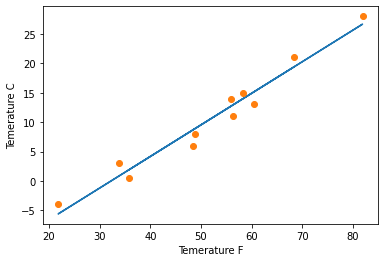

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure()
plt.xlabel("Temerature F")
plt.ylabel("Temerature C")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

Non linear model

In [ ]:
def model_non_lin(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def dmodel_dw1(t_u, w1, w2, b):
	return t_u

def dmodel_dw2(t_u, w1, w2, b):
  return t_u**2

def dmodel_db_non_lin(t_u, w1, w2, b):
	return 1.0

def grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
  dloss_db = dloss_dtp * dmodel_db_non_lin(t_u, w1, w2, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

def training_loop_non_lin(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w1, w2, b = params

    t_p = model_non_lin(t_u, w1, w2, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b)
    params = params - learning_rate * grad
    
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


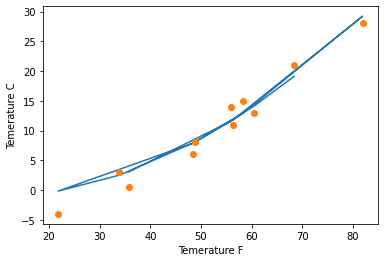

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop_non_lin(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

t_p = model_non_lin(t_un, *params)

fig = plt.figure()
plt.xlabel("Temerature F")
plt.ylabel("Temerature C")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

Problem 3

Housing Dataset

In [ ]:
import numpy as np 
import pandas as pd 

housing = pd.DataFrame(pd.read_csv(file_path + "Housing.csv")) 

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars]
y = Newtrain.pop('price').to_numpy(np.float)
x = Newtrain.to_numpy(np.float)

Models and functions for housing training

In [ ]:
def model_house(x, w, b):
  return np.matmul(x, w) + b

def dmodel_dw1_house(x, w, b):
  return x[:,0]
def dmodel_dw2_house(x, w, b):
  return x[:,1]
def dmodel_dw3_house(x, w, b):
  return x[:,2]
def dmodel_dw4_house(x, w, b):
  return x[:,3]
def dmodel_dw5_house(x, w, b):
  return x[:,4]

def dmodel_db_house(x, w, b):
  return 1.0

def grad_fn_house(x, y, pred, w, b):
  dloss_dtp = dloss_fn(pred, y)
  dloss_dw1 = dloss_dtp * dmodel_dw1_house(x, w, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2_house(x, w, b)
  dloss_dw3 = dloss_dtp * dmodel_dw3_house(x, w, b)
  dloss_dw4 = dloss_dtp * dmodel_dw4_house(x, w, b)
  dloss_dw5 = dloss_dtp * dmodel_dw5_house(x, w, b)
  dloss_db = dloss_dtp * dmodel_db_house(x, w, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
 
def training_loop_house(n_epochs, learning_rate, params, x, y):
  for epoch in range(1, n_epochs + 1):
    b = params[-1]
    w = params[:-1]

    pred = model_house(x, w, b)
    loss = loss_fn(pred, y)
    grad = grad_fn_house(x, y, pred, w, b)
    #print(params, grad)
    #input()
    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params


Epoch 500, Loss 2024805783902.583984
Epoch 1000, Loss 1863258466727.914307
Epoch 1500, Loss 1768051362590.842285
Epoch 2000, Loss 1704595000950.190430
Epoch 2500, Loss 1659789065346.188965
Epoch 3000, Loss 1627244053690.387207
Epoch 3500, Loss 1603242094079.036621
Epoch 4000, Loss 1585383250941.523193
Epoch 4500, Loss 1572022959620.682617
Epoch 5000, Loss 1561993317652.091797
tensor(7528113.7117, dtype=torch.float64)
tensor(13300000., dtype=torch.float64)


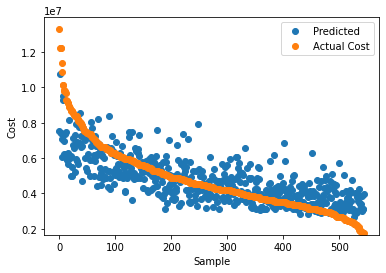

In [ ]:
max_x = np.amax(x, axis=0)
max_y = np.amax(y)

new_x = x
new_y = y 

# normalize all parameters
new_x[:,0] = x[:,0]/max_x[0]
new_x[:,1] = x[:,1]/max_x[1]
new_x[:,2] = x[:,2]/max_x[2]
new_x[:,3] = x[:,3]/max_x[3]
new_x[:,4] = x[:,4]/max_x[4]
# new_y = y/max_y

new_x = torch.tensor(new_x)
new_y = torch.tensor(new_y)

# train model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

pred = model_house(new_x, params[:-1], params[-1])
print(pred[0])
print(new_y[0])
fig = plt.figure()
plt.xlabel("Sample")
plt.ylabel("Cost")
plt.ylim([np.amin(y) * .95, np.amax(y) * 1.05])
plt.plot(pred.detach().numpy(), 'o', label="Predicted")
plt.plot(new_y.numpy(), 'o', label="Actual Cost")
plt.legend()